In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# The dataset for this example is a time series of foreign exchange rates per U.S. dollar.
Instead of the usual line chart representing the values over time, I want to visualize this data with a color-coded table, with the months as columns and the years as rows.

# For this example, we’ll use the columns 1 and 7, which are the ‘Time Serie’ and ‘CANADA — CANADIAN DOLLAR/US$’.
Let’s rename those columns to ‘DATE’ and ‘CAD_USD’, and since we’re passing our headers, we also need to skip the first row.
We also need to parse the first column, so the values are in a DateTime format, and we’ll define the date as our index.


In [ ]:
# Cores cmap gráfico de calor: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [66]:
df = pd.read_csv('Foreign_Exchange_Rates.csv',usecols=[1,7], names=['DATE', 'CAD_USD'],skiprows=1, index_col=0, parse_dates=[0])
display(df.head(15))

,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
2000-01-10,1.4568
2000-01-11,1.457
2000-01-12,1.455
2000-01-13,1.4495


# Let’s make sure all our values are numbers, and remove the empty rows as well.

In [67]:
# Vamos usar o pd.to_numeric do pandas para converter a coluna CAD_USD em valor numérico (assim , garantimos que são valores numéricos). Por default, ele retorna dtype float64 ou int64
df['CAD_USD'] = pd.to_numeric(df.CAD_USD, errors='coerce') # em erros = coerce, ele coloca NaN onde não tem valor
display(df.head(15))
df.dropna(inplace=True) # Vamos remover as linhas onde tem valores NaN
display(df.head(15))


,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
2000-01-10,1.4568
2000-01-11,1.4570
2000-01-12,1.4550
2000-01-13,1.4495


,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
2000-01-10,1.4568
2000-01-11,1.4570
2000-01-12,1.4550
2000-01-13,1.4495


# We need to aggregate those values by month. Let’s create separate columns for month and year, then we group the new columns and get the mean.

In [68]:
# create a copy of the dataframe, and add columns for month and year:
df_m = df.copy()

# Criando coluna de mês e atribuindo o número do mês:
df_m['month'] = [i.month for i in df_m.index]
display(df_m.head(15))

# Vamos entender o que foi feito acima:
display(df_m.index)
display(df_m.index.year)
display(df_m.index.month)

# Criando coluna de ano e atribuindo o número do ano:
df_m['year'] = [i.year for i in df_m.index]
display(df_m)

# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()

display(df_m)

,CAD_USD,month
DATE,,
2000-01-03,1.4465,1
2000-01-04,1.4518,1
2000-01-05,1.4518,1
2000-01-06,1.4571,1
2000-01-07,1.4505,1
2000-01-10,1.4568,1
2000-01-11,1.4570,1
2000-01-12,1.4550,1
2000-01-13,1.4495,1


DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='DATE', length=5019, freq=None)

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='DATE', length=5019)

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='DATE', length=5019)

,CAD_USD,month,year
DATE,,,
2000-01-03,1.4465,1,2000
2000-01-04,1.4518,1,2000
2000-01-05,1.4518,1,2000
2000-01-06,1.4571,1,2000
2000-01-07,1.4505,1,2000
...,...,...,...
2019-12-24,1.3160,12,2019
2019-12-26,1.3124,12,2019
2019-12-27,1.3073,12,2019


CAD_USD
month year          
1     2000  1.448600
      2001  1.503200
      2002  1.599714
      2003  1.541448
      2004  1.295755
...              ...
12    2015  1.371255
      2016  1.333919
      2017  1.276870
      2018  1.343611
      2019  1.316895

[240 rows x 1 columns]

# All that’s left to do is unstack the indexes, and we’ll have our table.

# Reshaping a DataFrame with Pandas stack() and unstack()

Reshaping is often needed when you work with datasets that contain variables with some kinds of sequences, say, time-series data.

Pandas provides various built-in methods for reshaping DataFrame. Among them, stack() and unstack() are the 2 most popular methods for restructuring columns and rows (also known as index).

- stack(): stack the prescribed level(s) from column to row.
- unstack(): unstack the prescribed level(s) from row to column. The inverse operation from stack.
Podemos usar dentro de stack ou unstack 0 ou 1 como level. Ele faz com que a apresentação dos valores do índice mudem para fins de apresentação na tabela.

Fonte: https://towardsdatascience.com/reshaping-a-dataframe-with-pandas-stack-and-unstack-925dc9ce1289
Vejamos a imagem a seguir:

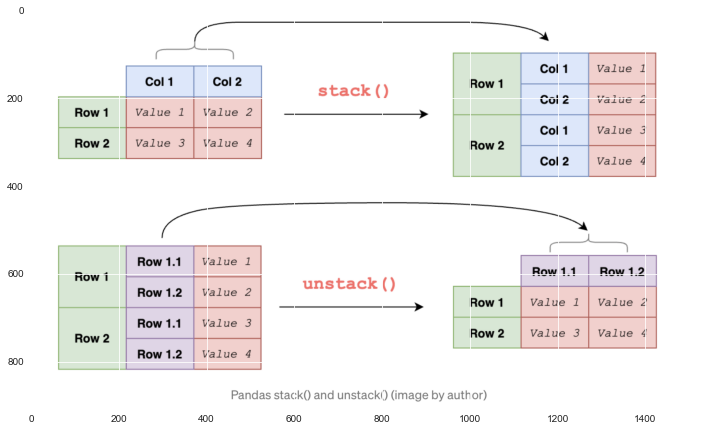

In [69]:
from skimage.io import imread

imagem = imread('Stack_Unstack.png')
plt.figure(figsize=[12,10])
plt.imshow(imagem) # Comando para mostrar imagem
plt.show()

In [70]:
# Vamos visualizar o df com level 0, que apresentará o índice como anos, e as colunas como meses.
# Se tivéssemos usando level = 1, o índice seriam os meses e as colunas seriam os anos.

df_m = df_m.unstack(level = 0)
display(df_m)

CAD_USD                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2000   1.448600  1.451210  1.460774  1.468875  1.495736  1.477045  1.477785   
2001   1.503200  1.521563  1.558741  1.557767  1.541050  1.524538  1.530790   
2002   1.599714  1.596400  1.587743  1.581486  1.550155  1.531840  1.545550   
2003   1.541448  1.512147  1.476081  1.458205  1.383957  1.352510  1.382091   
2004   1.295755  1.329895  1.328578  1.341973  1.378860  1.357841  1.322505   
2005   1.224835  1.240053  1.216026  1.235900  1.255529  1.240168  1.222855   
2006   1.157165  1.148895  1.157309  1.144105  1.109991  1.113727  1.129445   
2007   1.176262  1.170989  1.168159  1.134986  1.095086  1.065105  1.050186   
2008   1.009943  0.998555  1.002943  1.013718  0.999305  1.016624  1.012964   
2009   1.224820  1.245200  1.264518  1.224182  1.152785  1.126355  1.122861   
2010   1.043811  1.057211  1.022900  1.005209  1.040280  1.037623  1.042229   
2011   0.993945  0.987637  0.976561  0.957952  0.968043  0.976645  0.955315   
2012   1.012985  0.996745  0.993773  0.992824  1.009732  1.028000  1.014200   
2013   0.992057  1.009784  1.024424  1.018673  1.019559  1.031400  1.040214   
2014   1.094010  1.105442  1.110681  1.099209  1.089386  1.083038  1.073918   
2015   1.212190  1.249905  1.261832  1.233682  1.217640  1.236495  1.286314   
2016   1.420811  1.379690  1.322639  1.281814  1.294529  1.289405  1.305235   
2017   1.318305  1.310916  1.338700  1.343705  1.360573  1.329486  1.269040   
2018   1.242905  1.258821  1.293255  1.273162  1.286627  1.312452  1.313343   
2019   1.330045  1.320872  1.337052  1.337814  1.345977  1.328870  1.310523   

                                                         
month        8         9         10        11        12  
year                                                     
2000   1.482813  1.486430  1.512476  1.542638  1.521875  
2001   1.539857  1.567939  1.571677  1.592245  1.578755  
2002   1.569418  1.576135  1.578009  1.571453  1.559219  
2003   1.396271  1.363371  1.322095  1.313044  1.312755  
2004   1.312677  1.288095  1.246935  1.196770  1.218883  
2005   1.204283  1.177681  1.177415  1.181545  1.161481  
2006   1.118213  1.116120  1.128538  1.135881  1.153235  
2007   1.057852  1.026745  0.975413  0.967238  1.002070  
2008   1.053457  1.058205  1.184695  1.217094  1.233695  
2009   1.087238  1.081638  1.054676  1.059300  1.053691  
2010   1.040395  1.032957  1.017900  1.012900  1.008062  
2011   0.981709  1.002500  1.019800  1.024755  1.023524  
2012   0.992383  0.978300  0.987155  0.996970  0.989820  
2013   1.040718  1.034235  1.036282  1.048642  1.063919  
2014   1.092633  1.101052  1.121155  1.132539  1.153162  
2015   1.314724  1.326581  1.307224  1.327853  1.371255  
2016   1.299783  1.310776  1.325095  1.343415  1.333919  
2017   1.260770  1.227875  1.260690  1.277335  1.276870  
2018   1.304248  1.303400  1.300441  1.320480  1.343611  
2019   1.327314  1.324050  1.318923  1.323658  1.316895

# Colormaps
Everything is in place. Now we can use Seaborn’s .heatmap and plot our first chart.

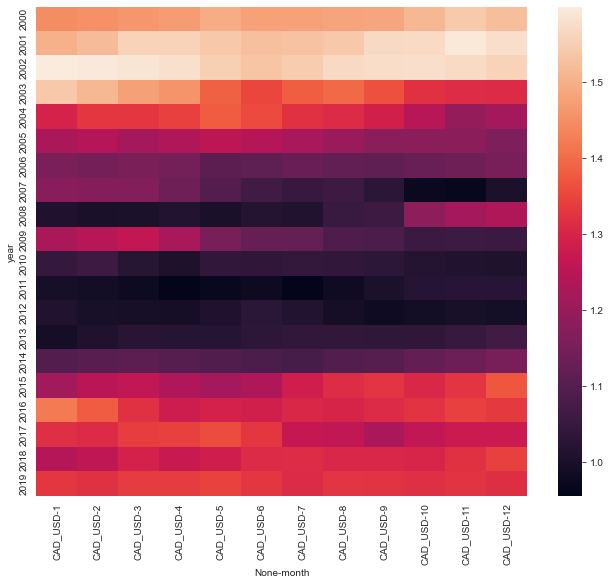

In [74]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(df_m)
plt.show()

# Alright, there’s lots to do before this visualization is ready.
The colors are the most critical part of our chart, and the colormap is a bit overcomplicated. We don’t need that; instead, we could use a sequential cmap with only two colors.

We can also make the limits of the colormap explicit by defining vmin and vmax. Pandas .min and .max can help us figure out what are the best values for those.


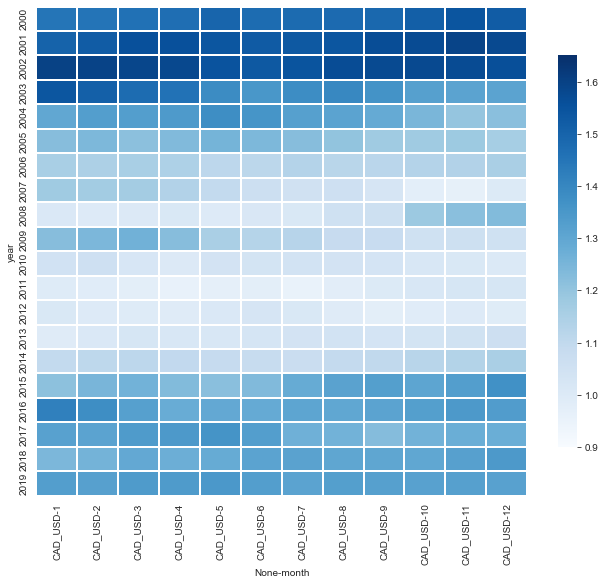

In [75]:
fig, ax = plt.subplots(figsize=(11, 9))

# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

# Customizing
There are lots of other arguments to be explored with .heatmap.
For example linewidth defines the size of the line between the boxes, and we can even pass arguments directly to the color bar with cbar_kws.
The colors look good, and now we can move our attention to the ticks. I don’t think CAD_USD-1 is the right name for January. Let’s replace them with some friendlier text.

Moving the ticks to the top of the chart would improve the visualization and make it look more like a table. We can also eliminate the x and y labels since the values in our axis are pretty self-explaining, and the title would also make them redundant.

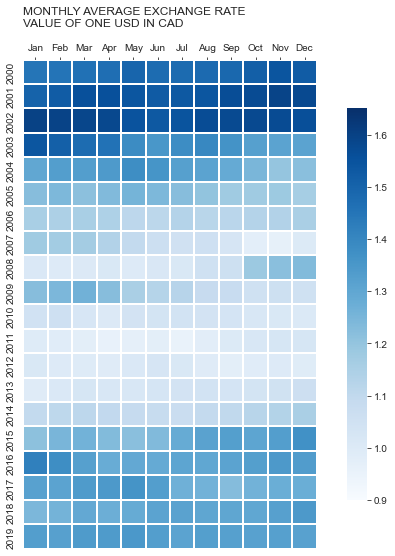

In [78]:
# Vamos fazer com a propriedade square = True. Dessa forma, ele alongará o gráfico

# figure
fig, ax = plt.subplots(figsize=(11, 9))

# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, square=True, linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels = xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')
plt.show()

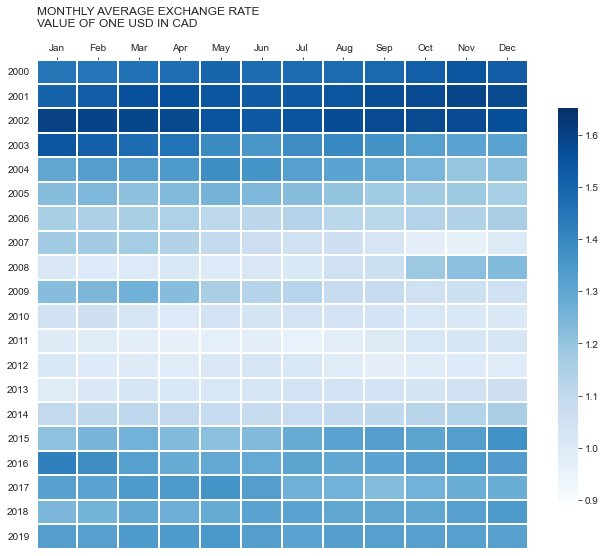

In [84]:
# Vamos fazer com a propriedade square = False (ou não precisamos colocar ela. Dessa forma, manterá a proporcionalidade do tamanho do gráfico

# figure
fig, ax = plt.subplots(figsize=(11, 9))

# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, square=False, linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels = xticks_labels)
plt.setp(ax.get_yticklabels(), rotation=0, ha='right', rotation_mode = "anchor") # Rotacionando os labels do eixo y

# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')
plt.show()